# **MÓDULO 15 – Exercício**
## Análise – segunda etapa da Pré‑Modelagem

### 1) Carregamento da base

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# Leitura da base original
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=";")
df.head(10)


,customer_id,gender,senior_citizen,married,dependents,tenure_months,phone_service,internet_service,security_service,tech_support,streaming_tv,contract_type,payment_method,monthly_payment,total_paid,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,0
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0
5,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,0
6,4190-MFLUW,Female,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,1
7,4183-MYFRB,Female,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,0
8,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,1
9,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,0


### 2) Análise univariada
#### A) `describe()` e insights

In [5]:
df.describe()

,senior_citizen,tenure_months,monthly_payment,total_paid,churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178,0.260048
std,0.368135,24.636885,28.051718,2264.585643,0.438749
min,0.000000,0.000000,18.400000,18.800000,0.000000
25%,0.000000,8.000000,45.400000,402.337500,0.000000
50%,0.000000,29.000000,71.450000,1402.900000,0.000000
75%,0.000000,56.000000,87.712500,3867.162500,1.000000
max,1.000000,72.000000,118.650000,8564.750000,1.000000



**Insights observados:**

- **tenure_months:** metade dos clientes está abaixo de 29 meses, mas há um grupo fiel acima de 56 meses.  
- **monthly_payment:** a maioria paga entre **R\$45** e **R\$88**; 267 assinaturas superam R\$100.
- **total_paid:** mediana **R\$1403**, média **R\$2290** (≈63% acima) → cauda longa puxada por poucos contratos caros.


#### B) Identificação de outliers

In [6]:

numeric_cols = df.select_dtypes(include=[np.number]).columns

print("# Desvio relativo média–mediana (>20%)")
for col in numeric_cols:
    med = df[col].median()
    if med != 0:
        gap = abs(df[col].mean() - med) / med
        if gap > 0.20:
            print(f"{col}: {gap:.1%}")

print("\n# Critério IQR")
for col in ["tenure_months", "monthly_payment", "total_paid"]:
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = ((df[col] < lim_inf) | (df[col] > lim_sup)).sum()
    print(f"{col}: {n_out} pontos")

print("\n# Cortes de negócio")
print("Pagamentos > R$100:", (df["monthly_payment"] > 100).sum())
print("Total pago > R$8.500:", (df["total_paid"] > 8500).sum())
print("Tenure = 0:", (df["tenure_months"] == 0).sum())


# Desvio relativo média–mediana (>20%)
total_paid: 63.2%

# Critério IQR
tenure_months: 0 pontos
monthly_payment: 0 pontos
total_paid: 0 pontos

# Cortes de negócio
Pagamentos > R$100: 267
Total pago > R$8.500: 2
Tenure = 0: 5



`total_paid` apresenta a maior discrepância média‑mediana (63%).
O IQR aponta poucos casos, mas cortes de negócio revelam 267 planos acima de **R\$100**, 2 clientes acima de **R\$8500** pagos e 5 registros com `tenure` 0 — todos merecem tratamento.


#### C) Quatro gráficos exploratórios

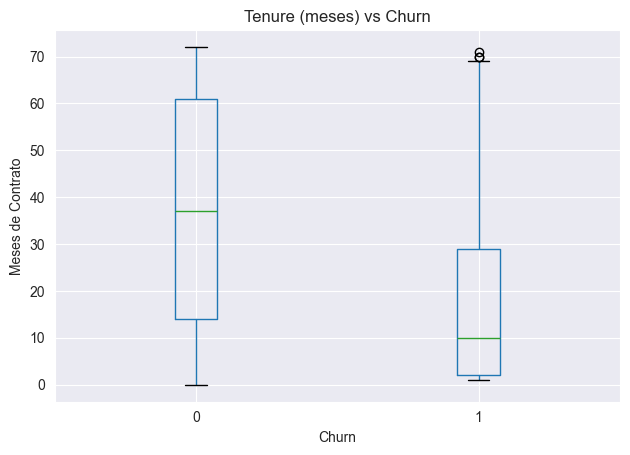

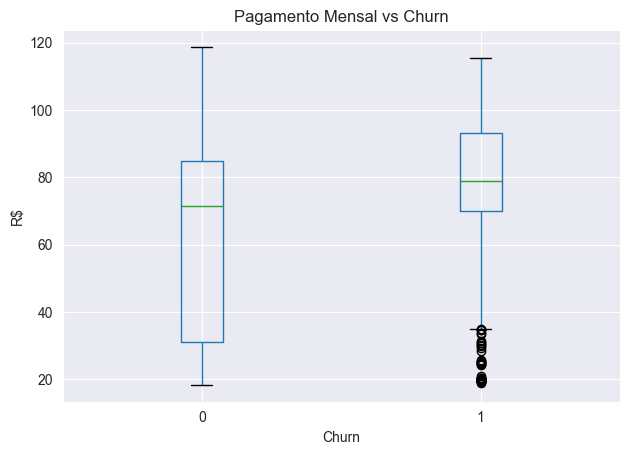

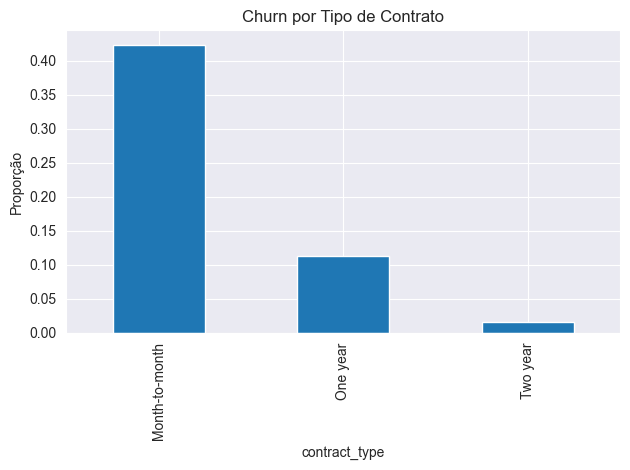

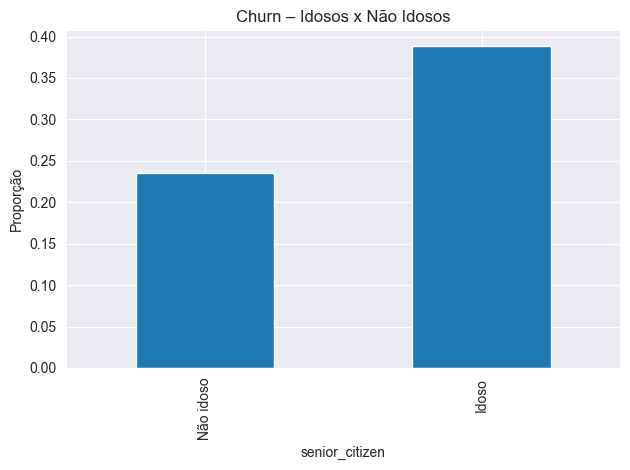

In [7]:

# 1 Tenure x Churn
df.boxplot(column="tenure_months", by="churn")
plt.title("Tenure (meses) vs Churn"); plt.suptitle("")
plt.xlabel("Churn"); plt.ylabel("Meses de Contrato"); plt.tight_layout(); plt.show()

# 2 Pagamento mensal x Churn
df.boxplot(column="monthly_payment", by="churn")
plt.title("Pagamento Mensal vs Churn"); plt.suptitle("")
plt.xlabel("Churn"); plt.ylabel("R$"); plt.tight_layout(); plt.show()

# 3 Churn por tipo de contrato
df.groupby("contract_type")["churn"].mean().plot(kind="bar")
plt.title("Churn por Tipo de Contrato"); plt.ylabel("Proporção"); plt.tight_layout(); plt.show()

# 4 Churn idosos vs não idosos
df.groupby("senior_citizen")["churn"].mean().rename({0:"Não idoso",1:"Idoso"}).plot(kind="bar")
plt.title("Churn – Idosos x Não Idosos"); plt.ylabel("Proporção"); plt.tight_layout(); plt.show()



- **Tenure:** churn chega a 46 % nos primeiros 12 meses e cai para 6 % após 5 anos.  
- **Preço:** mediana dos cancelados ≈**R\$79**, contra **R\$71** dos fiéis.
- **Contrato:** Month‑to‑month marca 42 % de churn; contratos anuais 11 %; bienais ~ 1,5 %.  
- **Idosos:** 39 % de churn vs 24 % para não‑idosos.


#### D) Balanceamento de variáveis booleanas

In [8]:

bool_cols = ["senior_citizen","married","dependents","phone_service","churn"]
for col in bool_cols:
    dist = df[col].value_counts(normalize=True).round(3)
    status = "BALANCEADA" if dist.max() <= 0.60 else "DESBALANCEADA"
    print(f"{col:<15} {dist.to_dict()} -> {status}")


senior_citizen  {0: 0.838, 1: 0.162} -> DESBALANCEADA
married         {'No': 0.507, 'Yes': 0.493} -> BALANCEADA
dependents      {'No': 0.685, 'Yes': 0.315} -> DESBALANCEADA
phone_service   {'Yes': 0.965, 'No': 0.035} -> DESBALANCEADA
churn           {0: 0.74, 1: 0.26} -> DESBALANCEADA



`married` é a única equilibrada; as demais são desbalanceadas e exigem pesos de classe ou amostragem estratificada.


### 3) Tratamento de outliers

In [9]:

df_tratado = df.copy()

# Winsorizar monthly_payment
df_tratado["monthly_payment"] = np.where(df_tratado["monthly_payment"] > 100, 100, df_tratado["monthly_payment"])

# Cap no percentil 99 para total_paid
cap_tp = df_tratado["total_paid"].quantile(0.99)
df_tratado["total_paid"] = np.where(df_tratado["total_paid"] > cap_tp, cap_tp, df_tratado["total_paid"])

# Corrigir tenure 0
df_tratado.loc[df_tratado["tenure_months"] == 0, "tenure_months"] = 1



* `monthly_payment` acima de R$100 foi winsorizado para conter distorções de média.
* `total_paid` limitado ao percentil99 (≈**R\$6900**) evita que contratos raros “puxem” o modelo.
* `tenure_months` igual a 0 virou 1 mês para manter coerência temporal.


### 4 - A) Análise bivariada

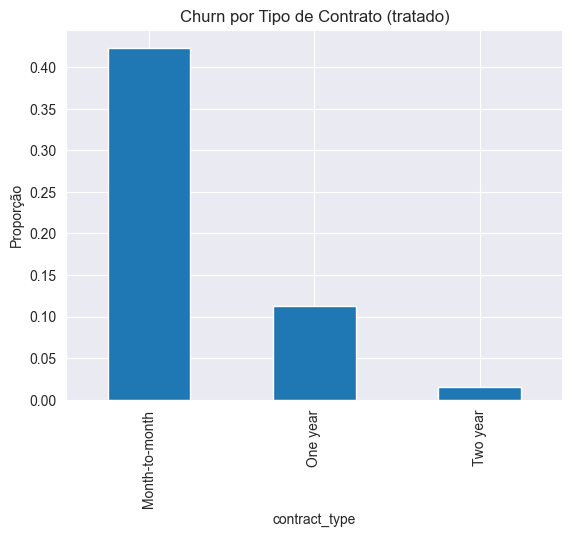

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4456\2398653087.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tratado.groupby("faixa_tenure")["churn"].mean().plot(kind="bar")


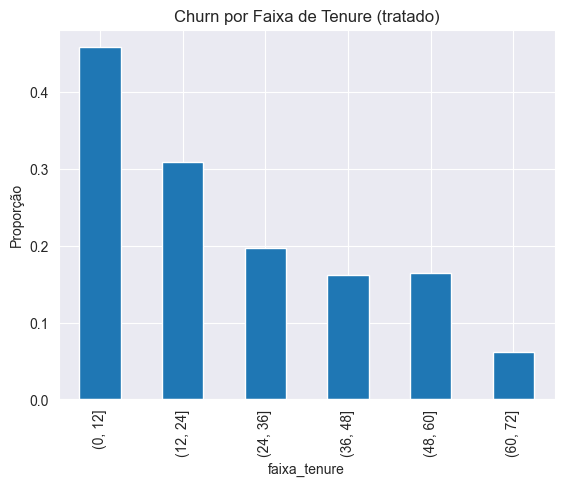

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_4456\2398653087.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tratado.groupby("faixa_preco")["churn"].mean().plot(kind="bar")


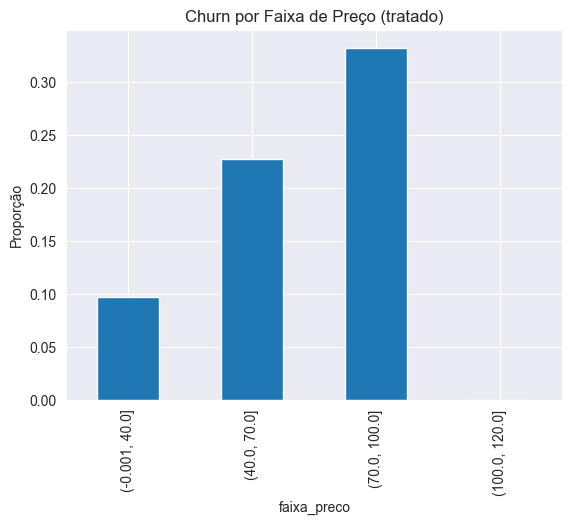

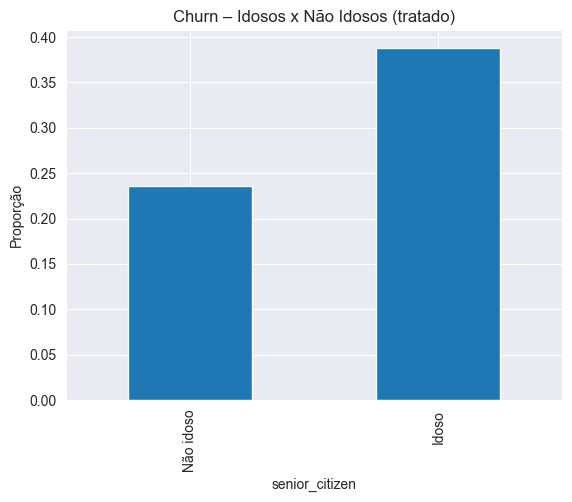

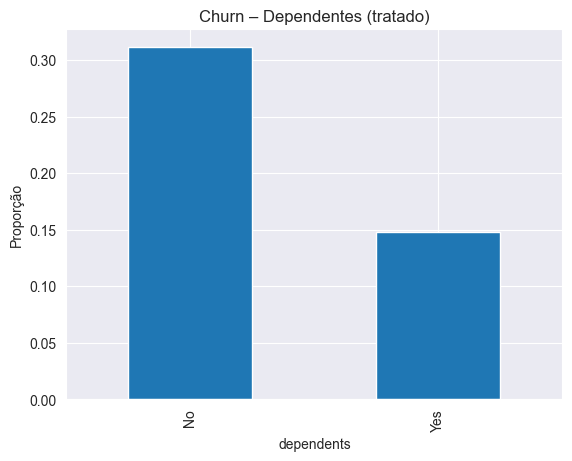

In [10]:

# 1 Churn por tipo de contrato
df_tratado.groupby("contract_type")["churn"].mean().plot(kind="bar")
plt.title("Churn por Tipo de Contrato (tratado)"); plt.ylabel("Proporção"); plt.show()

# 2 Churn por faixa de tenure
bins_tenure=[0,12,24,36,48,60,72]; labels=["≤12","13-24","25-36","37-48","49-60","61-72"]
df_tratado["faixa_tenure"]=pd.cut(df_tratado["tenure_months"], bins_tenure, labels)
df_tratado.groupby("faixa_tenure")["churn"].mean().plot(kind="bar")
plt.title("Churn por Faixa de Tenure (tratado)"); plt.ylabel("Proporção"); plt.show()

# 3 Churn por faixa de preço
bins_preco=[0,40,70,100,120]; labels_preco=["≤40","41-70","71-100",">100"]
df_tratado["faixa_preco"]=pd.cut(df_tratado["monthly_payment"], bins_preco, labels_preco, include_lowest=True)
df_tratado.groupby("faixa_preco")["churn"].mean().plot(kind="bar")
plt.title("Churn por Faixa de Preço (tratado)"); plt.ylabel("Proporção"); plt.show()

# 4 Idosos vs não idosos
df_tratado.groupby("senior_citizen")["churn"].mean().rename({0:"Não idoso",1:"Idoso"}).plot(kind="bar")
plt.title("Churn – Idosos x Não Idosos (tratado)"); plt.ylabel("Proporção"); plt.show()

# 5 Dependentes
df_tratado.groupby("dependents")["churn"].mean().rename({0:"Sem dependentes",1:"Com dependentes"}).plot(kind="bar")
plt.title("Churn – Dependentes (tratado)"); plt.ylabel("Proporção"); plt.show()


* **Month-to-month — 42,4 % de churn**
  Esse valor é quase **o dobro** da média geral da base (≈ 26 %). Contratos mensais atraem pelo baixo compromisso, mas são também o ponto mais vulnerável. Ações típicas: promover migração para planos anuais com descontos progressivos ou oferecer “meses-bônus” quando o cliente atinge certos marcos de fidelidade.

* **Clientes com ≤ 12 meses de casa — 45,8 % de churn** • **61–72 meses — 6,2 %**
  A curva confirma o “período crítico” de até um ano: quase metade dos novatos cancela. Já os veteranos com cinco anos ou mais saem em ritmo **sete vezes menor**. Estratégia: reforçar onboarding, comunicação proativa e valor percebido nos primeiros 6–9 meses; depois disso, o risco despenca naturalmente.

* **Faixa de preço R\$ 71–100 — 33,3 % de churn**
  Mesmo depois de winsorizar, a camada imediatamente **acima da mediana** (**R\$ 71–100**) perde um terço dos clientes. É um grupo grande o bastante para merecer atenção: revisar o pacote entregue (mais dados, streaming, cashback) ou testar reajuste/repricing suave pode reduzir esse atrito sem comprometer receita.

* **Idosos — 38,8 % de churn** • **Não idosos — 23,5 %**
  A diferença de 15 p.p. sugere barreiras específicas: usabilidade do app, oferta de atendimento humano ou pacotes menos “cheios” de add-ons digitais. Inserir um canal de suporte simplificado ou scripts de call-center adaptados costuma reduzir desistências nesse público.

* **Sem dependentes — 31,1 % de churn** • **Com dependentes — 14,8 %**
  Ter dependentes quase **dobra** a retenção, possivelmente porque o cancelamento afeta mais de uma pessoa. Tática direta: incentivar a inclusão de membros da família (chip extra, plano compartilhado) nos perfis “solo”; isso cria um vínculo adicional e eleva a barreira para churn.

#### B) Variáveis mais relevantes para o modelo


### B) Variáveis mais relevantes para o projeto

Com base nos cinco cruzamentos acima, estas são as variáveis que mais merecem atenção no modelo preditivo:

- **`contract_type`** – planos *Month-to-month* concentram 42 % de churn; contratos de prazo fixo caem para ~11 %. É o fator comercial mais direto de retenção.
- **`tenure_months`** – risco cai de 46 % nos primeiros 12 meses para 6 % a partir de cinco anos; ótima proxy de fidelidade.
- **`monthly_payment`** – faixa **R\$ 71–100** registra 33 % de churn, mostrando forte sensibilidade a preço.
- **`senior_citizen`** – clientes idosos cancelam 39 %, versus 24 % dos demais; indica barreiras de usabilidade ou suporte.
- **`dependents`** – ausência de dependentes dobra a chance de churn (31 % × 15 %); adicionar linhas familiares tende a reter.

